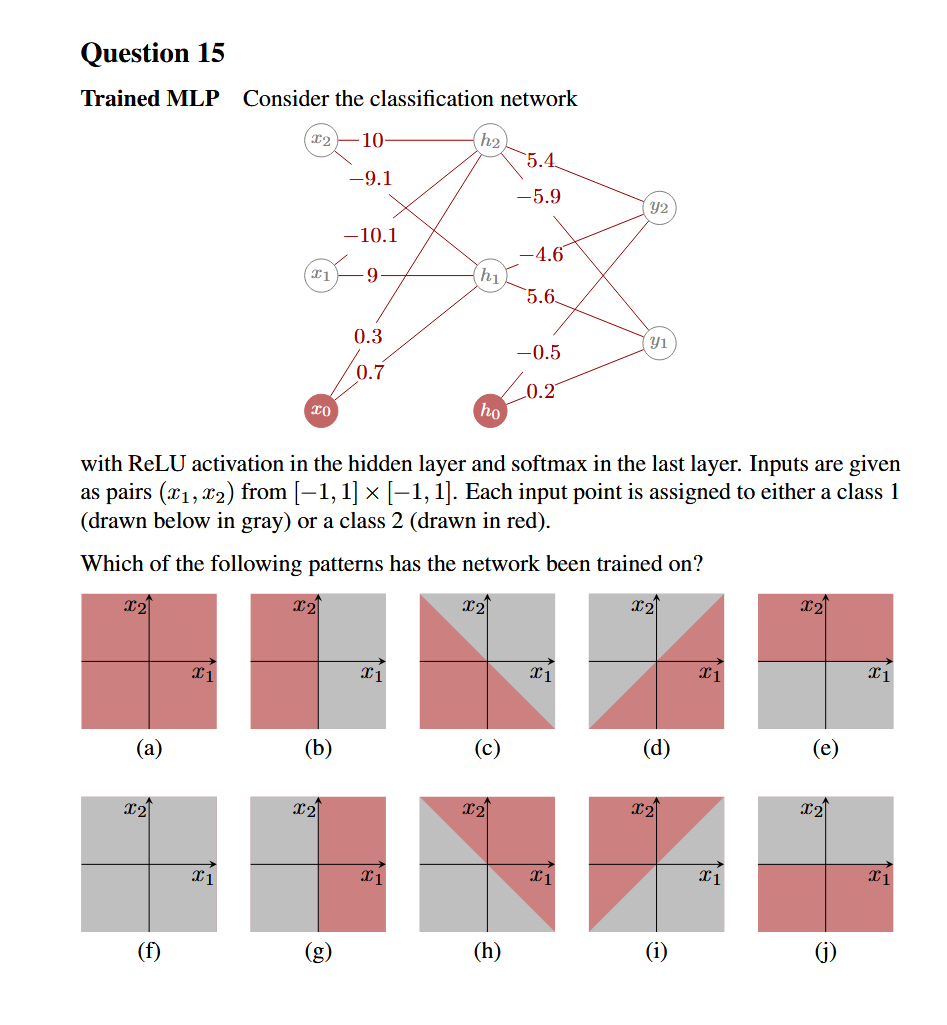

In [3]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / exp_x.sum()

def classification(x_1, x_2):
    # Input vector (including bias)
    X = np.array([1, x_1, x_2])
    
    # Weight matrix for hidden layer
    W_h = np.array([
        [0.7, 0.3],  # Bias weights
        [9, -10.1],   # Weights for x_1
        [-9.1, 10]    # Weights for x_2
    ])
    
    # Forward pass to hidden layer
    h_pre = X @ W_h
    h = relu(h_pre)
    
    # Add bias for output layer calculation
    H = np.array([1, h[0], h[1]])
    
    # Weight matrix for output layer
    W_o = np.array([
        [0.2, -0.5],  # Bias weights
        [5.6, -4.6],  # Weights for h_1
        [-5.9, 5.4]   # Weights for h_2
    ])
    
    # Forward pass to output layer
    y_pre = H @ W_o
    y_probs = softmax(y_pre)
    
    return np.argmax(y_probs)

# Test each point
points = [(-1, -1), (-1, 1), (1, -1), (1, 1)]
for i, (x_1, x_2) in enumerate(points):
    result = classification(x_1, x_2)
    print(f"Point {i+1} ({x_1}, {x_2}): Class {result+1}")

Point 1 (-1, -1): Class 1
Point 2 (-1, 1): Class 2
Point 3 (1, -1): Class 1
Point 4 (1, 1): Class 1


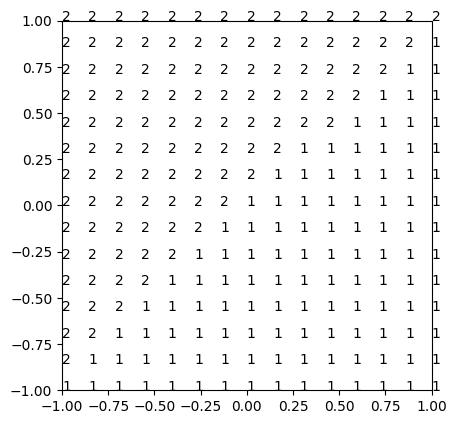

In [5]:
import matplotlib.pyplot as plt

#%% QUESTION 15, Trained MLP
def predict(x1, x2):
    h2 = max(10 * x2 - 9.1 * x1 + 0.3, 0.0)
    h1 = max(-9.1 * x2 + 9 * x1 + 0.7, 0.0)
    y2 = 5.4 * h2 - 4.6 * h1 - 0.5
    y1 = -5.9 * h2 + 5.6 * h1 + 0.2    
    return((y2 > y1) + 1)

fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
for x1 in np.linspace(-1, 1, 15, endpoint=True):
    for x2 in np.linspace(-1, 1, 15, endpoint=True):
        ax.text(x1, x2, predict(x1, x2))
plt.show()


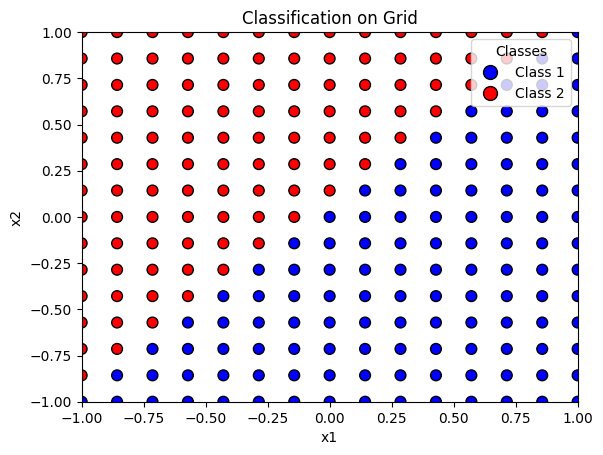

In [12]:
from matplotlib.lines import Line2D

# Prepare grid data for plotting
x_vals = np.linspace(-1, 1, 15)
y_vals = np.linspace(-1, 1, 15)
xx, yy = np.meshgrid(x_vals, y_vals)
grid_points = np.c_[xx.ravel(), yy.ravel()]
classes = [classification(x, y) + 1 for x, y in grid_points]
colors = ['blue' if c == 1 else 'red' for c in classes]

fig, ax = plt.subplots()
scatter = ax.scatter(grid_points[:, 0], grid_points[:, 1], c=colors, s=60, edgecolors='k')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Classification on Grid')
# add legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Class 1', markerfacecolor='blue', markersize=10, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Class 2', markerfacecolor='red', markersize=10, markeredgecolor='k')
]
ax.legend(handles=legend_elements, title="Classes")

plt.show()
